extraction algorithm:
1.) check the table layout across dates
2.) sort out layouts according to the different table No. see: layout
    problems found: merged tables
                    extra uncommon tables
3.) check the table order to all layouts. record differencies
    problems found: table order different
                    table structure different
4.) extract data according to step 3
    use temporary DF, check data valiation before mergeing to final pool
5.) save final pool to csv
    newRes - newly built residential
    secRes - second hand residential
    newRes90 - newly built residential below 90nm
    secRes90 - second hand residential below 90nm
6.) check missing dates
    Missing data: 2015/09 August not published


In [16]:
import json
from bs4 import BeautifulSoup as beauty
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
tables = json.load(open('china_tables.json', 'r'))
len(tables)

62

In [18]:
dates = sorted(list(tables.keys()))

In [19]:
# STEP 2:check data homogenity by no of tables per page
l = []
for i in dates:
    l.append(len(beauty(tables[i], 'lxml').find_all('tbody')))
set(l)

{2, 4, 5, 6}

In [20]:
layout = {2: [], 4:[], 5:[],6:[]}
for i, d in zip(l,dates):
    if i == 2:
        layout[2].append(d)
    elif i == 4:
        layout[4].append(d)
    elif i == 5:
        layout[5].append(d)
    else:
        layout[6].append(d)

In [21]:
#RESULT table layout differencies
for i in layout.keys():
    print('{} tables: {}'.format(i,len(layout[i])))

2 tables: 1
4 tables: 12
5 tables: 42
6 tables: 7


#### 5 table layout

In [197]:
#analysing table layout 5 at all layout settings. see layout.keys

for i in layout[5][:1]:
#for i in lengthoutlayer[:10]:
    print(i)
    
    for n in range(0,2):
        
        #code to identify adat allocations
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[1].text)
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[0].text)
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[2].text)
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[3].text)
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[5].text)
        print('\tbottom')
        print(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[-2].text)

201804
  Table I  
  Sales Price Indices of Newly Constructed Commercial Residential Buildings in 70 Large and Medium-Sized Cities  
  Cities   Price Indices of Newly Constructed Residential Buildings   Cities   Price Indices of Newly Constructed Residential Buildings  
  M/M   Y/Y   Fixed Base   M/M   Y/Y   Fixed Base  
                                 
	bottom
  Urumqi    100.8    109.3    107.4    Dali   100.9    108.1    110.8   
  Table II  
  Sales Price Indices of Second-Hand Residential Buildings in 70 Large and Medium-Sized Cities  
  Cities   M/M   Y/Y   Fixed Base   Cities   M/M   Y/Y   Fixed Base  
  Last Month=100   the Same Month Last Year=100   Year 2015=100   Last Month=100   the Same Month Last Year=100   Year 2015=100  
  Beijing    99.8    93.2    146.1    Tangshan    100.3    103.3    106.2   
	bottom
  Urumqi    102.1    113.8    112.2    Dali   100.3    104.6    103.3   


In [9]:
#to identify row homogenity across layout types
lengthoutlayer = []
lengthnormal = []
for i in layout[5][:]:
    l = []  # tablelength temp
    for n in range(5):
        
        l.append(len(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')))
    if l != [42,41,41,76,76]:
        lengthoutlayer.append(i)
    else: lengthnormal.append(i)
        
print('{} dates has different row numbers'.format(len(lengthoutlayer)))

15 dates has different row numbers


In [48]:
#examining outlayers
for m,i in enumerate(lengthoutlayer):
    l = []  # tablelength temp
    for n in range(5):
        
        l.append(len(beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')))
    print(m,i, l)

0 201610 [66, 41, 41, 76, 76]
1 201701 [66, 41, 41, 76, 76]
2 201703 [66, 41, 41, 76, 76]
3 201707 [66, 41, 41, 76, 76]
4 201708 [66, 41, 41, 76, 76]
5 201709 [66, 42, 42, 77, 77]
6 201710 [66, 41, 41, 76, 76]
7 201711 [66, 41, 41, 76, 76]
8 201712 [66, 41, 41, 76, 75]
9 201801 [65, 41, 41, 76, 76]
10 201804 [42, 41, 77, 77, 22]
11 201805 [42, 41, 77, 77, 22]
12 201806 [42, 41, 77, 77, 22]
13 201807 [42, 41, 77, 77, 22]
14 201808 [42, 41, 77, 77, 22]


#RESULT table structure: 
    start tr[5]
    lengthnormal [42,41,41,76,76]
        -table 1: tr[-3] Newly Constructed Residential Buildings
        table 2: tr[-2] Newly Constructed Commercial Residential Buildings
        -table 3: tr[-2] Second-Hand Residential Buildings - All
        table 4: tr[-2] Newly Constructed Residential Buildings by Floor Space
        table 5: tr[-2] Second-Hand Residential Buildings by Floor Space
    lengthoutlayer[10:]  [42, 41, 77, 77, 22]
        -table 1: tr[6;-2] Newly Constructed Residential Buildings
        -table 2: tr[5;-2] Second-Hand Residential Buildings
        table 3: tr[6,-2] Newly Constructed Residential Buildings by Floor Space
        table 4: tr[6,-2] Second-Hand Residential Buildings by Floor Space
        table 5: tr[6;-2] Newly Constructed Commercial Residential in 15 Hot Cities
    lengthoutlayer[:9] [66, 41, 41, 76, 76]
        table 1:  tr[6;-4] Newly Constructed Commercial Residential in 15 Hot Cities
        -table 2: tr[5;-2] Newly Constructed Commercial Residential Buildings
        -table 3: tr[5,-2] Second-Hand Residential Buildings - All
        table 4: tr[5,-2] Newly Constructed Residential Buildings by Floor Space
        table 5: tr[5,-2] Second-Hand Residential Buildings by Floor Space 
    lengthoutlayer[9] [65, 41, 41, 76, 76]
        table 1:  tr[6;-3] Newly Constructed Commercial Residential in 15 Hot Cities
        -table 2: tr[5;-2] Newly Constructed Commercial Residential Buildings
        -table 3: tr[5,-2] Second-Hand Residential Buildings - All
        table 4: tr[5,-2] Newly Constructed Residential Buildings by Floor Space
        table 5: tr[5,-2] Second-Hand Residential Buildings by Floor Space
    lengthoutlayer[5] [66, 42, 42, 77, 77]
        table 1:  tr[6;-3] Newly Constructed Commercial Residential in 15 Hot Cities
        -table 2: tr[6;-2] Newly Constructed Commercial Residential Buildings
        -table 3: tr[6,-2] Second-Hand Residential Buildings - All
        table 4: tr[6,-2] Newly Constructed Residential Buildings by Floor Space
        table 5: tr[6,-2] Second-Hand Residential Buildings by Floor Space
    lengthoutlayer[8]
        table 1:  tr[6;-4] Newly Constructed Commercial Residential in 15 Hot Cities
        -table 2: tr[5;-2] Newly Constructed Commercial Residential Buildings
        -table 3: tr[5,-2] Second-Hand Residential Buildings - All
        table 4: tr[5,-2] Newly Constructed Residential Buildings by Floor Space
        table 5: tr[4,-2] Second-Hand Residential Buildings by Floor Space

#### Newly Constructed Residential Buildings

In [17]:
newRes = pd.DataFrame()
for i in lengthnormal:
    l = len(beauty(tables[i],'lxml').find_all('tbody')[0].find_all('tr'))
    dick = {}
    for n in range(5,l-2):
        c = beauty(tables[i],'lxml').find_all('tbody')[0].find_all('tr')[n].find_all('td')[0].text.strip()
        v = beauty(tables[i],'lxml').find_all('tbody')[0].find_all('tr')[n].find_all('td')[1].text.strip()
        dick[c] = v
    for n in range(5,l-2):
        c = beauty(tables[i],'lxml').find_all('tbody')[0].find_all('tr')[n].find_all('td')[4].text.strip()
        v = beauty(tables[i],'lxml').find_all('tbody')[0].find_all('tr')[n].find_all('td')[5].text.strip()
        dick[c] = v
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    newRes = pd.concat([newCRes,df], sort = True, axis =1)

In [14]:
backup=newRes.copy()

In [140]:
newRes.drop(index='', axis=0, inplace=True)

In [23]:
#newRes.to_csv('newRes38.csv')

#### Second-Hand Residential Buildings

In [13]:
secRes = pd.DataFrame()
#print(beauty(tables[lengthoutlayer[0]],'lxml').find_all('tbody')[2].find_all('tr')[0].text)

for i in lengthnormal+lengthoutlayer[:10]:
    print(i)
    l = len(beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr'))
    dick = {}
    for n in range(5,l-1):
        c = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[0].text.strip()
        v = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[1].text.strip()
        dick[c] = v
    for n in range(5,l-1):
        c = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[4].text.strip()
        v = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[5].text.strip()
        dick[c] = v
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    secRes = pd.concat([secRes,df], sort = True, axis =1)

201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201506
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201701
201703
201707
201708
201709
201710
201711
201712
201801


In [15]:
secRes = secRes[sorted(secRes.columns)]

In [16]:
secRes.columns

Index(['201407', '201408', '201409', '201410', '201411', '201412', '201501',
       '201502', '201503', '201504', '201506', '201510', '201511', '201512',
       '201601', '201602', '201603', '201604', '201605', '201606', '201607',
       '201608', '201609', '201610', '201701', '201703', '201707', '201708',
       '201709', '201710', '201711', '201712', '201801', '201804', '201805',
       '201806', '201807', '201808'],
      dtype='object')

In [19]:
#secRes.to_csv('secRes38.csv')

#### Newly Constructed Residential Buildings by Floor Space

In [23]:
newRes90 = pd.DataFrame()
for i in lengthoutlayer[10:]:
    print(i)
    l = len(beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr'))
    dick = {}
    for n in range(6,l-1):
        c = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[0].text.strip()
        v = beauty(tables[i],'lxml').find_all('tbody')[2].find_all('tr')[n].find_all('td')[1].text.strip()
        dick[c] = v
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    newRes90 = pd.concat([newRes90,df], sort = True, axis =1)

201804
201805
201806
201807
201808


In [27]:
newRes90 = newRes90[sorted(newRes90.columns)]

In [ ]:
newRes90.dropna(inplace=True)

In [ ]:
#check value integrity
newRes90.loc[:,'201501']

In [76]:
#newRes90.to_csv('newRes90.csv', index_label = None)

#### Second-Hand Residential Buildings by Floor Space

In [102]:
secRes90 = pd.DataFrame()

for i in lengthnormal+lengthoutlayer[:10]:
    print(i)
    l = len(beauty(tables[i],'lxml').find_all('tbody')[4].find_all('tr'))
    dick = {}
    for n in range(5,l-1):
        c = beauty(tables[i],'lxml').find_all('tbody')[4].find_all('tr')[n].find_all('td')[0].text.strip().replace('*','')
        v = beauty(tables[i],'lxml').find_all('tbody')[4].find_all('tr')[n].find_all('td')[1].text.strip()
        dick[c] = v
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    secRes90 = pd.concat([secRes90,df], sort = True, axis =1)

201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201506
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201701
201703
201707
201708
201709
201710
201711
201712
201801


In [106]:
secRes90 = secRes90[sorted(secRes90.columns)]

In [136]:
secRes90 = secRes90[1:]

,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,...,201709,201710,201711,201712,201801,201804,201805,201806,201807,201808
Anqing,99.7,99.5,99.0,99.2,99.1,99.6,99.9,99.7,99.9,99.8,...,100.4,100.3,99.9,99.9,100.3,100.0,99.8,100.1,100.7,100.6
Baotou,99.5,98.7,99.2,99.1,99.1,99.7,99.9,99.5,99.2,99.3,...,100.4,100.2,99.4,100.0,100.5,100.0,100.6,100.2,100.6,101.0
Beihai,99.7,99.1,98.8,98.9,98.9,99.5,99.1,99.5,99.6,100.0,...,100.4,100.2,100.4,100.0,99.8,100.1,100.4,100.5,100.9,100.7
Beijing,98.8,99.2,99.1,98.7,100.2,100.9,100.3,99.9,99.9,100.5,...,99.0,99.3,99.5,NaN,99.5,99.9,99.9,100.5,100.2,100.5
Bengbu,99.7,99.2,98.4,98.9,98.5,99.0,99.1,99.5,99.4,99.5,...,100.1,100.1,100.1,99.9,99.9,100.1,100.3,100.2,100.1,101.7
Changchun,99.8,99.6,99.1,99.0,99.0,99.4,99.5,99.7,99.6,99.7,...,100.2,100.6,100.5,100.6,100.6,100.7,100.7,101.3,102.0,100.5
Changde,100.0,99.6,99.4,99.2,99.2,99.9,100.0,99.3,99.7,100.1,...,100.2,100.4,100.1,100.3,100.1,100.1,100.2,100.4,100.8,100.6
Changsha,100.1,98.5,99.5,99.1,99.3,99.6,99.8,100.0,99.8,99.8,...,100.4,100.6,100.2,100.3,100.0,100.4,100.4,100.1,101.3,102.1
Chengdu,99.7,99.0,99.1,99.0,99.3,99.8,99.8,99.3,99.7,99.9,...,100.4,100.5,100.7,99.9,100.3,99.8,99.6,100.6,100.6,101.6
Chongqing,99.6,99.3,99.2,98.8,99.2,99.6,99.8,99.7,99.6,99.9,...,100.8,100.7,100.2,100.3,100.3,100.5,100.7,100.9,101.0,101.1


In [138]:
#secRes90.to_csv('secRes90.csv')

#### layout[4]

In [305]:
# discover table stucture, dinamic code
layout[4] = sorted(layout[4])
for i in sorted(layout[4][1:]): # control date
    print(i, layout[4].index(i))
    for n in range(3,4): #control table on the page
        for m in range(75,76): #control rows
            
            row1 = beauty(tables[i], 'lxml').find_all('tbody')[n].find_all('tr')[0].text
            
            #print(i,title,'\n',row1)
            print(row1)
            #print(i,'\n',row1)
'''            
conclusion:
[4] N/A, not proprety; deleted, new listorder in layout[4]
  newRes:
    table [0]
        [3:]] homogenious start 6:-2, 0/1+4/5
        [0] 5:-3, , 0/1+4/5
        [1] 28:-3, 0/1+4/5
        [2]  29:-2  0/1+4/5
           
 secRes:
     [3:]] table[1] 5:-2, 0/1
     [1,2] table[1] 5:-2 0/1+4/1
     [0] table[2] 5:-2 0/1+4/1
     
 newRes90
     [3:]] table[2] 6:-2, 0/1
     [1,2] table[2] 6: -2 0/1
     [0] table[3] 5:74 0/1
 secRes90
     [3:]] table[3] 6:75, 0/1 / [3] has merged table with 15 top cities
     [1,2] table[3] 6:75 0/1
     [0] table[3] 80:-3 0/1
    
'''

201802 1
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201803 2
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201809 3
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201903 4
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201904 5
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201905 6
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201906 7
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201907 8
  Price Indices of Second-Hand Residential Buildings by Floor Space in 70 Large and Medium-Sized Cities  
201908 9
  Price Indices of Second-Hand Residential Buildings by Floor Space in 

'            \nconclusion:\n[4] N/A, not proprety; deleted, new listorder in layout[4]\n  newRes:\n    table [0]\n        [3:]] homogenious start 6:-2, 0/1+4/5\n        [0] 5:-3, , 0/1+4/5\n        [1] 28:-3, 0/1+4/5\n        [2]  29:-2  0/1+4/5\n           \n secRes:\n     [3:]] table[1] 5:-2, 0/1\n     [1,2] table[1] 5:-2 0/1+4/1\n     [0] table[2] 5:-2 0/1+4/1\n     \n newRes90\n     [3:]] table[2] 6:-2, 0/1\n     [1,2] table[2] 6: -2 0/1\n     [0] table[3] 5:74 0/1\n secRes90\n     [3:]] table[3] 6:75, 0/1 / [3] has merged table with 15 top cities\n     [1,2] table[3] 6:75 0/1\n     [0] table[3] 80:-3 0/1\n    \n'

In [310]:
# this code is altered accordint to table layouts

temp = pd.DataFrame() # temporary df is used to check the data before merging with all
for i in layout[4][:1]:
    print(i)
    for m in range(3,4):
        l = len(beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr'))
        dick = {}
        for n in range(80,l-2):
            c = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[0].text.strip().replace('*','')
            v = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[1].text.strip()
            #d = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[4].text.strip().replace('*','')
            #w = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[5].text.strip()
            dick[c] = v
            #dick[d] = w
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    temp = pd.concat([temp,df], sort = True, axis =1)

201507


In [315]:
#temp.isnull().sum()
temp = temp[1:]
temp.shape

(70, 1)

In [84]:
#load saved data
newRes = pd.read_csv('newRes38.csv')
newRes.set_index(keys = newRes.columns[0], drop = True, inplace= True)
newRes.index.name = ''
newRes = newRes[1:]

In [140]:
print(newRes.shape)
newRes = pd.concat([newRes,temp], sort = True, axis = 1)
print(newRe[s.shape])

(70, 47)
(70, 49)


In [141]:
#newRes.to_csv('newRes_49.csv', index_label = None)

In [223]:
secRes = pd.read_csv('secRes38.csv', index_col = 0)
secRes.shape
#secRes[:2]

(70, 38)

In [240]:
secRes = pd.concat([secRes,temp], axis = 1, sort = True)
secRes.shape

(70, 49)

In [242]:
#secRes.to_csv('secRes_49.csv', index_label= None)

In [243]:
newRes90 = pd.read_csv('newRes90.csv', index_col = 0)
newRes90.shape

(70, 38)

In [278]:
newRes90 = pd.concat([newRes90, df], axis = 1, sort = True)
newRes90.shape

(70, 49)

In [280]:
#newRes90.to_csv('newRes90.csv', index_label = None)

In [307]:
secRes90 = pd.read_csv('secRes90.csv', index_col = 0)
secRes90.shape

(70, 38)

In [317]:
secRes90 = pd.concat([secRes90, temp], axis = 1, sort = True)
secRes90.shape

(70, 49)

In [319]:
#secRes90.to_csv('secRes90.csv', index_label = None)

#### layout[6]

In [402]:
# examining layout[6]
for i in layout[6][:1]:  # page control
    print(i, layout[6].index(i))
    for m in range(4,5):  #table control
        print('table ', m)
        for n in range(6,7): #row control
            row = beauty(tables[i], 'lxml').find_all('tbody')[m].find_all('tr')[n].text
            print(n, row)
            
'''
 [0] newRes: table[0] 5:-2 0/1+4/5
     secRes: table[2] 5:-2 0/1+4/5
     newRes90: table[3] 5: -2 0/1
     secRes90: table[4] 6: -2 0/1
     
 [1:]newRes: table[1] 5:-3 0/1+4/5
     secRes: table[3] 5:-2 0/1+4/5
     newRes90: table[4] 5: -2 0/1
     secRes90: table[5] 5: -2 0/1
'''

201505 0
table  4
6   Beijing    102.1    98.4    120.1    102.0    98.3    117.5    102.2    98.3    114.5   


'\n [0] newRes: table[0] 5:-2 0/1+4/5\n     secRes: table[2] 5:-2 0/1+4/5\n     newRes90: table[3] 5: -2 0/1\n     secRes90: table[4] 6: -2 0/1\n     \n [1:]newRes: table[1] 5:-3 0/1+4/5\n     secRes: table[3] 5:-2 0/1+4/5\n     newRes90: table[4] 5: -2 0/1\n     secRes90: table[5] 5: -2 0/1\n'

In [403]:
# extract layout[6]
temp = pd.DataFrame() # temporary df is used to check the data before merging with all
for i in layout[6][:1]:
    print(i)
    for m in range(4,5):
        l = len(beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr'))
        dick = {}
        for n in range(6,l-1):
            c = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[0].text.strip().replace('*','')
            v = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[1].text.strip()
            #d = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[4].text.strip().replace('*','')
            #w = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[5].text.strip()
            dick[c] = v
            #dick[d] = w
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    temp = pd.concat([temp,df], sort = True, axis =1)     

201505


In [404]:
#temp = temp[1:]
temp.shape
#temp

(70, 1)

In [364]:
print(newRes.shape)
newRes = pd.concat([newRes,temp], axis = 1, sort = True)
newRes.shape

(70, 55)


(70, 56)

In [365]:
#newRes.to_csv('newRes_56.csv', index_label = None)

In [376]:
print(secRes.shape)
secRes = pd.concat([secRes,temp], axis = 1, sort = True)
print(secRes.shape)

(70, 55)
(70, 56)


In [377]:
#secRes.to_csv('secRes_56.csv', index_label = None)

In [382]:
print(newRes90.shape)
newRes90 = pd.concat([newRes90,temp], axis = 1, sort = True)
print(newRes90.shape)

(70, 49)
(70, 56)


In [383]:
#newRes90.to_csv('newRes90.csv', index_label= None)

In [405]:
print(secRes90.shape)
secRes90 = pd.concat([secRes90, temp], axis = 1, sort = True)
print(secRes90.shape)

(70, 55)
(70, 56)


In [406]:
#secRes90.to_csv('secRes90.csv', index_label = None)

#### layout[2]

In [443]:
# examining layout[2]
for i in layout[2][:1]:  # page control
    print(i, layout[2].index(i))
    for m in range(1):  #table control
        print('table ', m)
        for n in range(270,274): #row control
            row = beauty(tables[i], 'lxml').find_all('tbody')[m].find_all('tr')[n].text
            print(n, row)

'''
layout[2][1], '201811' not the property data
table[0] newRes table[0]: 5:39  0/1+4/5
         secRes table[0]: 88:122 0/1+4/5
         newRes90 table[0]: 129:198 0/1
         secRes90 table[0]: 205:274 0/1
    

'''

201508 0
table  0
270   Sanya   99.9    97.6    94.6    100.3    97.4    93.4    100.0    96.5    91.0       
271   Luzhou   100.5    98.3    103.3    100.4    98.4    103.4    100.4    97.2    101.9       
272   Nanchong   100.0    96.2    102.1    99.9    95.3    100.7    99.9    93.7    98.2       
273   Zunyi   100.3    99.0    108.8    100.4    97.6    110.6    100.6    97.4    107.5       
274   Dali   99.8    93.9    97.9    99.8    94.6    96.2    99.7    91.1    94.5       
275                                              
276                                                                                  
277                                                                    


IndexError: list index out of range

In [460]:
# extract layout[2]
temp = pd.DataFrame() # temporary df is used to check the data before merging with all
for i in layout[2][:1]:
    print(i)
    for m in range(0,1):
        l = len(beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr'))
        dick = {}
        for n in range(205,275):
            c = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[0].text.strip().replace('*','')
            v = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[1].text.strip()
            #d = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[4].text.strip().replace('*','')
            #w = beauty(tables[i],'lxml').find_all('tbody')[m].find_all('tr')[n].find_all('td')[5].text.strip()
            dick[c] = v
            #dick[d] = w
    df = pd.DataFrame(dick.values(), columns = [i], index = dick.keys())
    temp = pd.concat([temp,df], sort = True, axis =1)

201508


In [39]:
temp.shape

(70, 1)

In [45]:
print(newRes.shape)
newRes = pd.concat([newRes,temp], axis = 1, sort = True)
print(newRes.shape)

(70, 57)
(70, 62)


In [46]:
#newRes.to_csv('newRes.csv', index_label= None)

In [56]:
print(secRes.shape)
secRes = pd.concat([secRes,temp], axis = 1, sort = True)
print(secRes.shape)

(70, 57)
(70, 62)


In [57]:
#secRes.to_csv('secRes.csv', index_label= None)

In [68]:
print(newRes90.shape)
newRes90 = pd.concat([newRes90,temp], axis = 1, sort = True)
print(newRes90.shape)

(70, 57)
(70, 62)


In [69]:
#newRes90.to_csv('newRes90.csv', index_label = None)

In [77]:
print(secRes90.shape)
secRes90 = pd.concat([secRes90,temp], axis = 1, sort = True)
print(secRes90.shape)

(70, 57)
(70, 62)


In [78]:
#secRes90.to_csv('secRes90.csv', index_label = None)

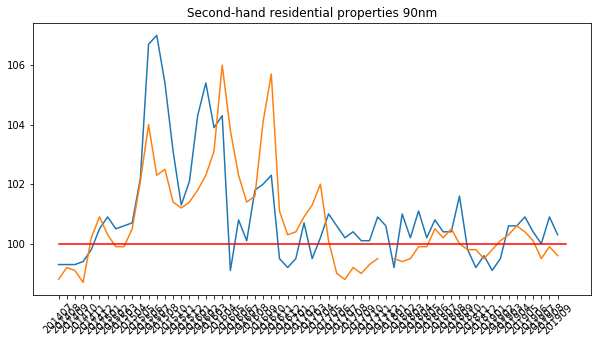

In [79]:
secRes90 = secRes90.loc[:, sorted(secRes90.columns)]
fig = plt.figure(figsize=(10,5))
shenzhen = secRes90.loc['Shenzhen',:].astype(float)
beijing = secRes90.loc['Beijing',:].astype(float)
#guan = secRes.loc['Guang',:].astype(float)
plt.plot(secRes90.columns, shenzhen)
plt.plot(secRes90.columns, beijing)
plt.plot((0,len(secRes90.columns)),(100,100), c = 'r')
plt.xticks(rotation=45)
plt.title('Second-hand residential properties 90nm')
plt.show()